In [7]:
from qiskit import QuantumCircuit
from qiskit import execute, Aer
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram

In [8]:
from qiskit import IBMQ
apitoken='079973672da38f22cb830632bb057c81bb6884566cadc0855a3edac7a7c9df0c24b58b021fda18c0ec59e9971a91701d9e3265d5d9a1e723a89f304affb1537b'

try :
    IBMQ.enable_account(token=apitoken)
except:
    pass

provider=IBMQ.get_provider(project='default')
real_device=provider.get_backend('ibmq_paris')

In [9]:
device_properties=real_device.properties()
device_coupling_map = real_device.configuration().coupling_map
device_basis_gate=real_device.configuration().basis_gates

In [10]:
from qiskit.providers.aer import noise
noise_model = noise.NoiseModel().from_backend(backend=real_device)

### With Noise Model

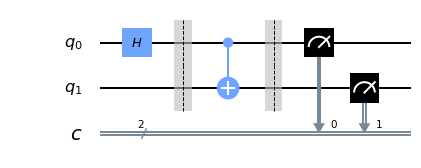

In [11]:

Q_bell=QuantumCircuit(2,2)

Q_bell.h(0)
Q_bell.barrier()
Q_bell.cx(0,1)
Q_bell.barrier()
Q_bell.measure([0,1],[0,1])

Q_bell.draw(output='mpl')

{'01': 167, '00': 2446, '11': 2266, '10': 121}


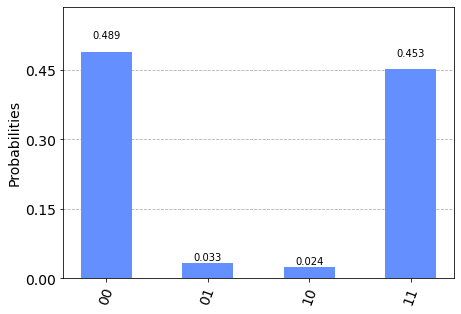

In [12]:
# Perform a noise simulation
result = execute(Q_bell, Aer.get_backend('qasm_simulator'),basis_gates=device_basis_gate,shots=5000,
                 noise_model=noise_model).result()
counts = result.get_counts(0)
print(result.get_counts())
plot_histogram(counts)

### Yout Quantum Circuit